In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\LightGBM Regression/agriculture_yield_dataset.csv")
df.head()

,soil_ph,rainfall_mm,temperature_c,fertilizer_kg_per_acre,pesticide_liters,seed_quality_score,sunlight_hours,crop_yield_quintals
0,6.12,835.5,18.0,91.8,3.42,10,5.7,67.619432
1,7.85,532.9,24.6,169.7,2.79,10,6.1,86.823624
2,7.20,876.0,17.5,98.9,3.22,2,6.3,62.259705
3,6.80,922.1,28.8,94.9,3.76,7,9.6,75.246067
4,5.47,912.0,25.4,84.9,6.00,1,2.9,51.453841


In [3]:
df.shape

(1000, 8)

In [4]:
#df.astype(int)

In [5]:
df.isnull().sum()

soil_ph                   0
rainfall_mm               0
temperature_c             0
fertilizer_kg_per_acre    0
pesticide_liters          0
seed_quality_score        0
sunlight_hours            0
crop_yield_quintals       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   soil_ph                 1000 non-null   float64
 1   rainfall_mm             1000 non-null   float64
 2   temperature_c           1000 non-null   float64
 3   fertilizer_kg_per_acre  1000 non-null   float64
 4   pesticide_liters        1000 non-null   float64
 5   seed_quality_score      1000 non-null   int64  
 6   sunlight_hours          1000 non-null   float64
 7   crop_yield_quintals     1000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [7]:
df.describe()

,soil_ph,rainfall_mm,temperature_c,fertilizer_kg_per_acre,pesticide_liters,seed_quality_score,sunlight_hours,crop_yield_quintals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.470850,819.779300,25.069300,122.736200,5.476350,5.512000,5.935300,69.098868
std,0.876484,197.786932,4.852615,42.600704,2.584842,2.915194,1.524063,10.493548
min,5.010000,215.700000,9.900000,50.000000,1.000000,1.000000,1.700000,39.243320
25%,5.707500,687.200000,21.800000,85.500000,3.300000,3.000000,5.000000,61.507850
50%,6.490000,816.850000,25.050000,122.250000,5.340000,5.000000,5.900000,68.995181
75%,7.232500,947.950000,28.300000,158.925000,7.745000,8.000000,6.900000,76.787747
max,8.000000,1438.600000,40.700000,199.900000,9.990000,10.000000,10.700000,98.409548


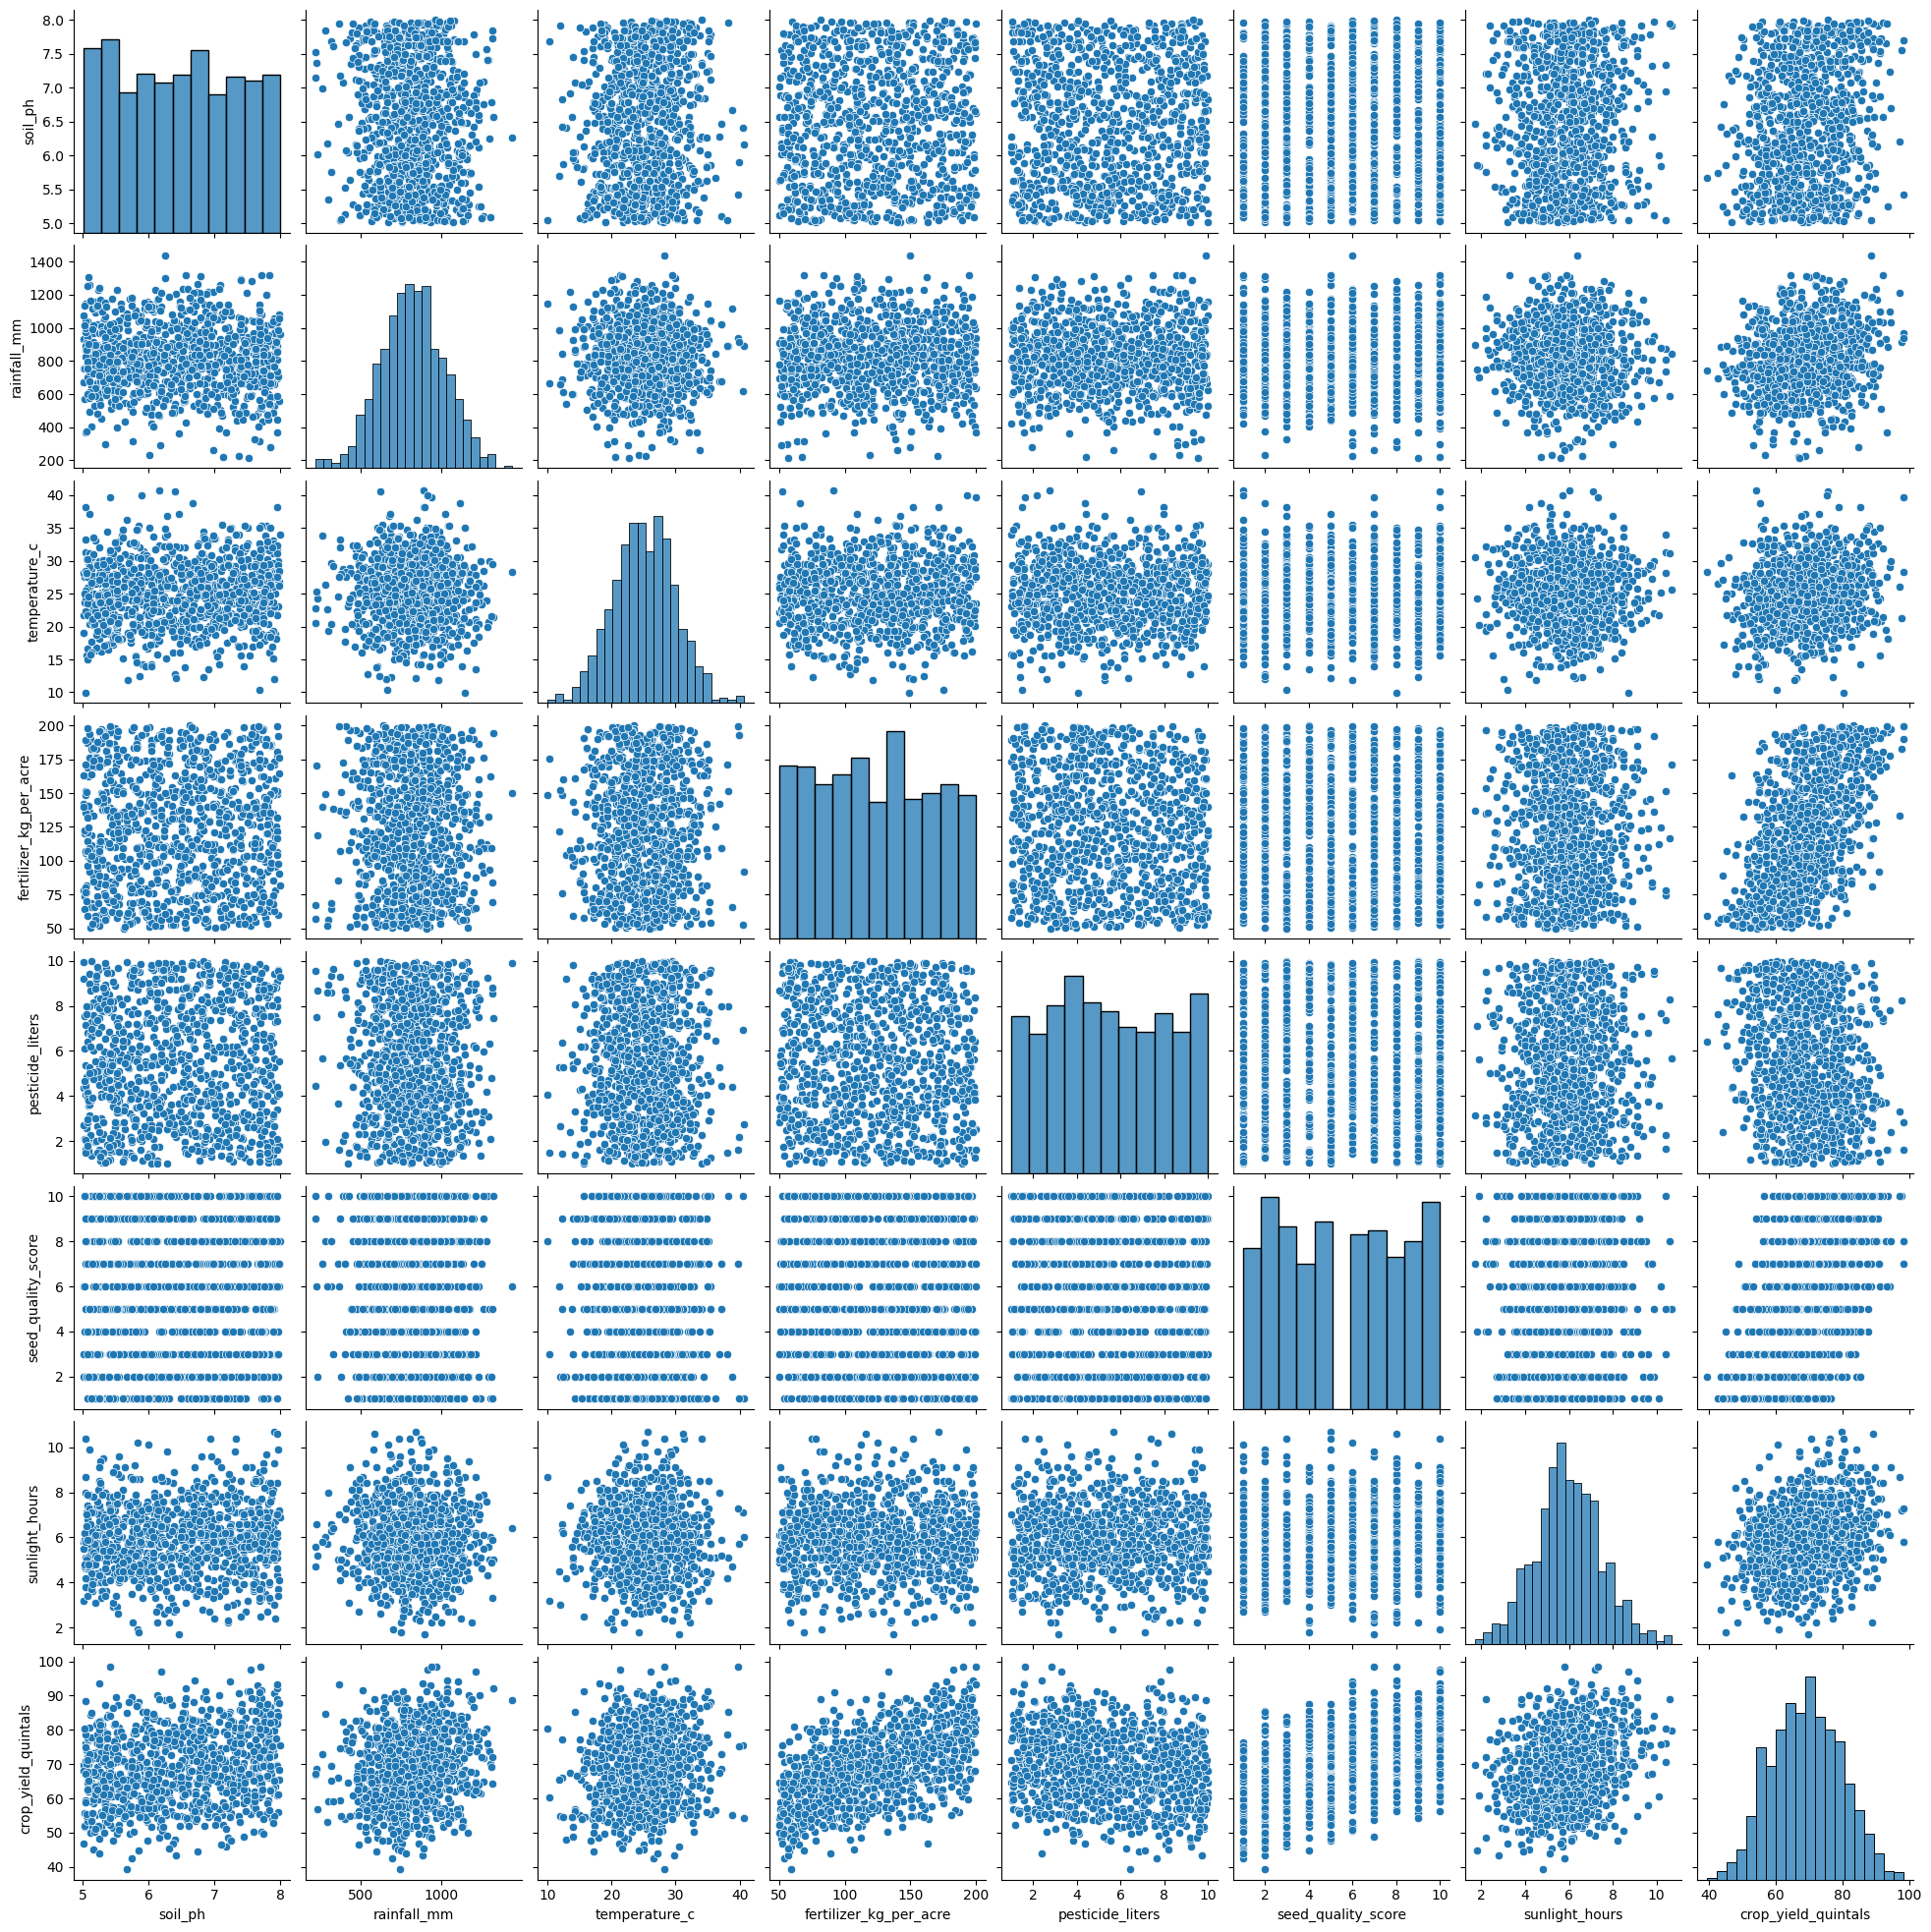

In [8]:
sns.pairplot(data=df)
plt.show()

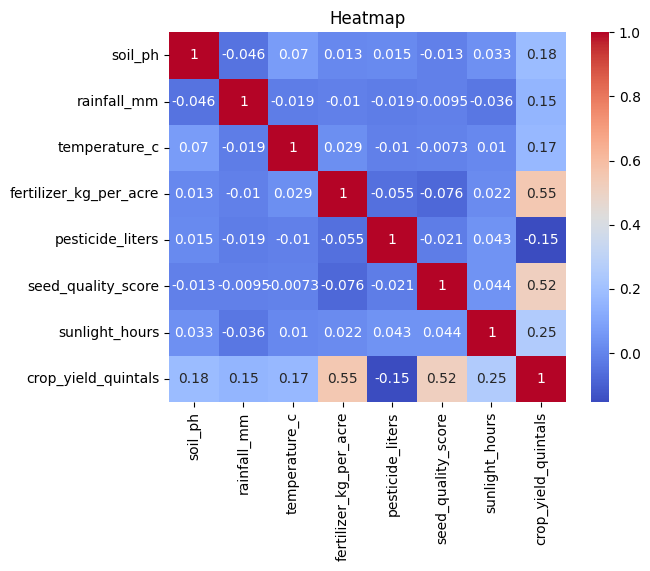

In [9]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

In [10]:
x=df.iloc[:,:-1]
y=df[["crop_yield_quintals"]]

In [11]:
x.shape

(1000, 7)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [14]:
x_scaled.head()

,soil_ph,rainfall_mm,temperature_c,fertilizer_kg_per_acre,pesticide_liters,seed_quality_score,sunlight_hours
0,-0.400493,0.079523,-1.457531,-0.726553,-0.795940,1.540291,-0.154467
1,1.574289,-1.451172,-0.096759,1.102970,-1.039790,1.540291,0.108121
2,0.832319,0.284391,-1.560620,-0.559806,-0.873353,-1.205326,0.239414
3,0.375722,0.517587,0.769187,-0.653748,-0.664338,0.510685,2.405763
4,-1.142463,0.466496,0.068183,-0.888603,0.202686,-1.548528,-1.992581


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=19) #20 #19 #13

In [17]:
# pip install lightgbm

In [18]:
from lightgbm import LGBMRegressor

In [19]:
lgb = LGBMRegressor(n_estimators=100,max_depth=5,reg_alpha=0.1, reg_lambda=0.1)
lgb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 7
[LightGBM] [Info] Start training from score 69.169382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,5
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [20]:
lgb.score(x_test,y_test)*100,lgb.score(x_train,y_train)*100

(72.8831072802308, 90.49077516508144)

In [21]:
df["Prediction"] = lgb.predict(x)
df.head()

,soil_ph,rainfall_mm,temperature_c,fertilizer_kg_per_acre,pesticide_liters,seed_quality_score,sunlight_hours,crop_yield_quintals,Prediction
0,6.12,835.5,18.0,91.8,3.42,10,5.7,67.619432,95.435332
1,7.85,532.9,24.6,169.7,2.79,10,6.1,86.823624,95.435332
2,7.20,876.0,17.5,98.9,3.22,2,6.3,62.259705,95.435332
3,6.80,922.1,28.8,94.9,3.76,7,9.6,75.246067,95.435332
4,5.47,912.0,25.4,84.9,6.00,1,2.9,51.453841,93.640617


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
y_pred = lgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 4.83
📉 MSE: 34.78
📉 RMSE: 5.90
🎯 R² Score: 72.88


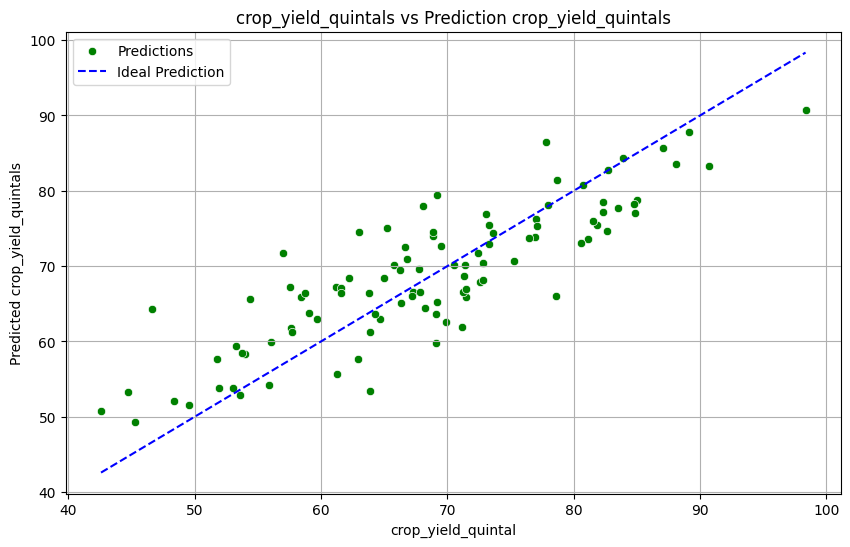

In [24]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='g', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='Blue', linestyle='--', label='Ideal Prediction')
plt.xlabel("crop_yield_quintal")
plt.ylabel("Predicted crop_yield_quintals")
plt.title("crop_yield_quintals vs Prediction crop_yield_quintals")
plt.legend()
plt.grid(True)
plt.show()
